### OpenCV
- Open Source Computer Vision의 약자
- 영상처리에 사용할 수 있는 오픈 소스 라이브어이
- 컴퓨터가 사람의 눈처럼 인식할 수 있게 처리해주는 역할
- 인공지능 발달로 인해 공장 제품 검사, 의료 영상 처리 등 다양한 분야에서 사용되고 있음
- C++로 설계되어 실시간 처리에 중점을 두고 빠른 속도와 효율성을 자랑함

In [1]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import cv2
cv2.__version__
# opencv의 경우에 다른 라이브러리와 충돌이 자주 발생하는 편


'4.12.0'

### 고정된 환경에서 개발을 하기 위한 방법 -> 가상환경
#### 1. 가상환경 생성
```python -m venv 가상환경이름```
#### 2. 가상환경 실행
```가상환경이름\Scropts\activate```
#### 3. 기본 kernel 설치
```
python -m pip install --upgrade pip
pip install jupyter ipykernel
```
#### 4. 커널 등록(가상환경 등록)
```python -m ipykernel install --user --name 가상환경이름 --display-name "보여주고싶은이름"```
#### 번외) 내가 현재 가지고있는 라이브러리 목록을 txt 파일로 뽑고싶을 때
```pip freeze > requirements.txt```
#### 번외2) requirements.txt 파일로 다시 가상환경에 같은 세팅을 하고 싶을 때
```pip install -r requirements.txt```

In [3]:
!pip freeze > requirements.txt

### 이미지 출력

In [4]:
import cv2
# cv2 자체가 가지고있는 이미지 출력 가능 : imread(경로)
img = cv2.imread('data/trollge.jpg')
# opencv 이미지 출력 기능
cv2.imshow('img', img)
cv2.waitKey(0) # 무한대기 // 지정된 시간동안 사용자 키 입력 대기
cv2.destroyAllWindows() # 모든 창 닫기

#### 읽기 옵션
- 1. cv2.IMREAD_COLOR : 컬러 이미지, 투명 영역은 무시(기본값)
  2. cv2.IMREAD_GRAYSCALE : 흑백 이미지
  3. cv2.IMREAD_UNCHANGED : 투명 영역까지 포함

In [5]:
img_color = cv2.imread('data/trollge.jpg', cv2.IMREAD_COLOR)
img_gray = cv2.imread('data/trollge.jpg', cv2.IMREAD_GRAYSCALE)
img_unchanged = cv2.imread('data/trollge.jpg', cv2.IMREAD_UNCHANGED)

cv2.imshow('img', img_color)
cv2.imshow('img', img_gray)
cv2.imshow('img', img_unchanged)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 이미지 정보 확인하기

In [6]:
print('color :', img_color.shape)
print('color :', img_gray.shape)
print('color :', img_unchanged.shape)

color : (400, 544, 3)
color : (400, 544)
color : (400, 544, 3)


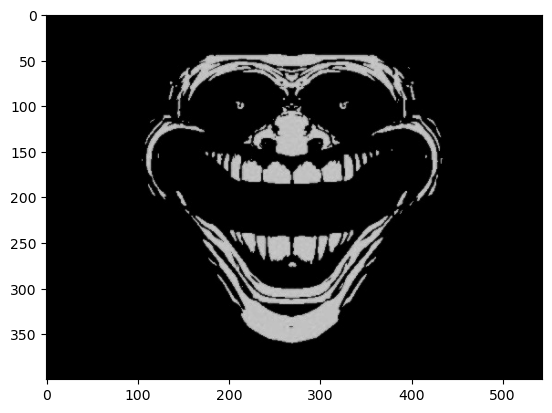

In [7]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('data/trollge.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 색상공간 변형 opencv 표준색상은 BGR,matplotlib 표준색상 RGB
plt.imshow(img)
plt.show()

### 색상공간 변환
- 시각은 색상정보에 대해 잘못된 정보를 보내주는 경우가 많음
    - 밤에 색상을 볼 때 정확한 색상을 보여주지 못함 - 명도(검정색이 섞이는 것)
    - 색상에 빛을 강하게 비추는 경우 정확한 색상을 보여주지 못함 - 채도(흰색이 섞이는 것)
    - 칼라는 너무 많은 정보를 가지고 있기 때문에 연산량이 많음 - 실시간 처리가 어려움
    - 따라서 gray 이미지나 binary 이미지로 변환해서 처리
    - gray 이미지 : 0~255로 된 픽셀로만 구성된 흑백이미지
    - binary(이진) 이미지 : 검정색(0)과 흰색(255)으로만 구성된 이미지, 0과 1로 이루어진 이미지
        - 특정 패턴이나 물체의 윤곽을 감지
        - 배경/물체 구별
        - 텍스트 필터링
        - 뼈의 윤관/mri스캔 종양 식별
        - 자율주행 시 장애물/cktjs 등 감지
        - 제품 결함 및 불량품 식별 등 사용 가능

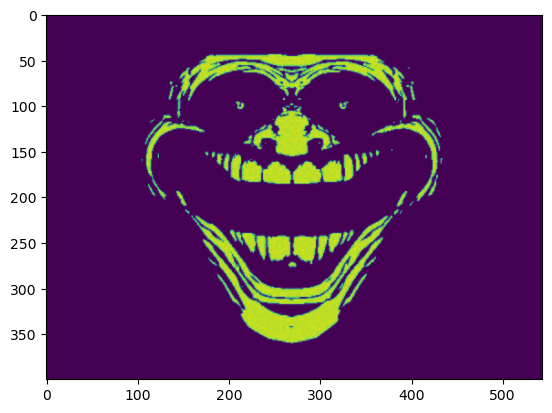

In [8]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('data/trollge.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 색상공간 변형
plt.imshow(img) # cmap = 'color' (기본값)

### 이진(Binary) 이미지 구성(이미지 이진화)
- 0, 1(255) 데이터 구성하기
- cv2.threshold(img, threshold_value, value, flag)
- img : Grayscaled 이미지
- threshold_value : 픽셀 임계값(0과 1로 나누기 위한 기준값)
- value : 임계값보다 클 때 적용되는 값
- flag : 임계값 적용 방법
    - cv2.THRESH_BINARY : 임계값보다 픽셀값이 크면 value, 아니면 0을 할당
    - cv2.THRESH_BINARY_INV : 임계값보다 픽셀값이 크면 0, 아니면 value를 할당(BINARY 반대)
    - cv2.THRESH_TRUNC : 임계값보다 큰 픽셀 값은 모두 임계값, 아니면 픽셀값은 변경되지 않음(이미지 밝기 조절, 밝은 영역을 어둡게 만들어 세부 정보가 잘 드러나게)

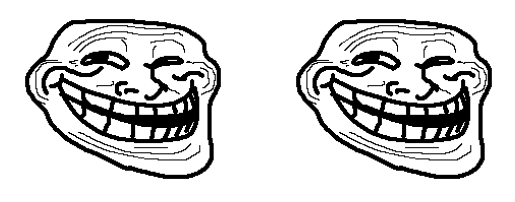

In [9]:
# 흑백 이미지로 읽어오기
img = cv2.imread('data/Trollface.png', cv2.IMREAD_GRAYSCALE)

# 이미지 이진화
# _, 변형이미지 = cv2.threshold(대상, 임계값(기준값), 값, 이진화종류값)
_, thr_img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
# 값을 2개 리턴 retval, dst -> 사용된 임계값, 이진화된 결과이미지 -> 이미지만 쓰기위해 _를 사용(버릴 변수)

# plt.subplot(행, 열, 순서)
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(img, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(thr_img, cmap = 'gray')
plt.show()

#### 자동으로 임계값을 찾아주는 기능 : Otsu(오츠)의 이진화

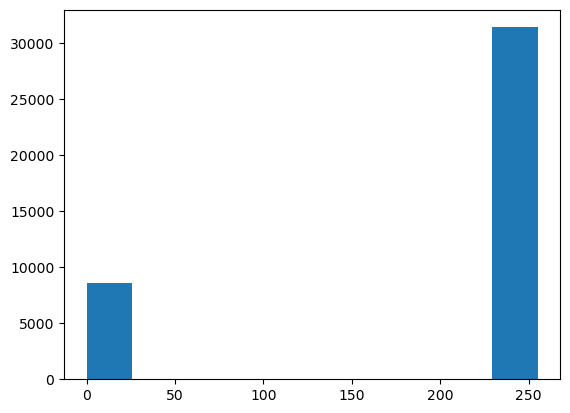

In [10]:
# 히스토그램
# threshold 이진화 기준을 잡기 위해 -> 히스토그램의 봉우리 기준
img.reshape(-1).shape
plt.hist(img.reshape(-1))
plt.show()

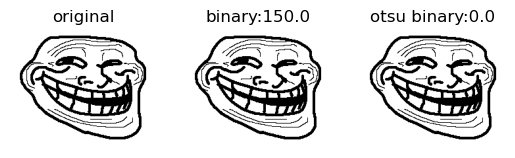

In [11]:
# 흑백 이미지로 읽어오기
img = cv2.imread('data/Trollface.png', cv2.IMREAD_GRAYSCALE)

# 이미지 이진화
# _, 변형이미지 = cv2.threshold(대상, 임계값(기준값), 값, 이진화종류값)
_, thr_img = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
# 값을 2개 리턴 retval, dst -> 사용된 임계값, 이진화된 결과이미지 -> 이미지만 쓰기위해 _를 사용(버릴 변수)
thr_val, thr_img2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# THRESH_OTSU : 옵션처럼 사용 반드시 다른 이진화 종류값과 |(버티컬바)로 연결해서 사용

# plt.subplot(행, 열, 순서)
plt.subplot(1, 3, 1)
plt.title('original')
plt.axis('off')
plt.imshow(img, cmap = 'gray')

plt.subplot(1, 3, 2)
plt.title(f'binary:{_}')
plt.axis('off')
plt.imshow(thr_img, cmap = 'gray')

plt.subplot(1, 3, 3)
plt.title(f'otsu binary:{thr_val}')
plt.axis('off')
plt.imshow(thr_img2, cmap = 'gray')
plt.show()

- 이진화로 특정 영역을 표현해보기
- 이미지 중심에 있는 정해진 크기에 사각형 영역을 이진화 표현해보기

<img src="https://img.notionusercontent.com/s3/prod-files-secure%2F4cc1fb7e-3ef4-49f8-a0ac-8b575c63345f%2F6dac6e86-56ed-4524-88ce-e9082913db7e%2Fimage.png/size/w=2000?exp=1764211139&sig=021yF5jSGWn_ylkUq1vyX1XPEmhQ79wW6vdRqKC6_dc&id=2b7aa318-b143-8045-b545-d770efe19f51&table=block" width=200px height=200px/>

153 459 153 459


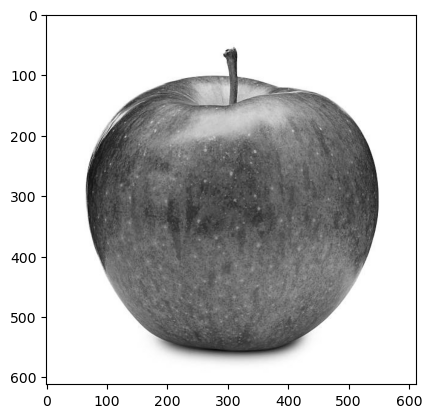

In [13]:
# apple 변수에 흑백으로 사진 읽어오기
# plt 사용해서 흑백 이미지로 출력해보기
apple = cv2.imread('data/apple.jpg', cv2.IMREAD_COLOR)
apple_gray = cv2.cvtColor(apple, cv2.COLOR_BGR2GRAY)
height, width = apple_gray.shape # 2차원
center_x, center_y = width // 2, height // 2 # 중심 좌표 계산
# print(height, width)
# print(center_x, center_y)

# 정사각형 영역 접근하기
# 좌상,하단 좌표, 우상,하단 좌표를 계산
rect_width, rect_height = center_x // 2, center_y // 2
bottom_left_x = center_x - rect_width
top_left_y = center_y - rect_height
bottom_right_x = center_x + rect_width
top_right_y = center_y + rect_height

#print(bottom_left_x, bottom_right_x, top_left_y, top_right_y)

# 사각형 영역 추출하기 - 배열 슬라이싱(접근)
# 배열[행시작:행끝, 열시작:열끝]
rect_region = apple_gray[top_left_y:bottom_rigt_x, top_left_y:top_right_y]
print(rect_region.shape)

# rect_region 이진화 변형
thr_val, apple_bin = cv2.threshold(rect_region, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 원본 이미지에 이진화 변형 이미지 대입하기
apple2 = apple_gray.copy() # 깊은복사(원본 형태 복사) : 원본이 변형되더라도 복사본이 그대로 유지됨
apple2[top_left_y:bottom_rigt_x, top_left_y:top_right_y] = apple_bin

plt.imshow(apple_gray, cmap = 'gray')
# plt.axis('off')
plt.show()

### 텍스트 인식(OCR)
- 텍스트가 담긴 이미지를 기계가 읽을 수 있는 텍스트 포멧으로 변환하는 과정
- 이미지 > TEXT
- pytesseract 모듈 사용
- https://github.com/UB-Mannheim/tesseract/wiki
- https://github.com/tesseract-ocr/tessdata/tree/main
- C 드라이브 -> ProgramFiles -> tesseract-OCR -> tessdata 폴더에 kor.traineddata 넣어주기

In [14]:
!pip install pytesseract

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [15]:
# 환경 변수 추가
import pytesseract as pyt
pyt.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
# tesseract-ocr 프로그램의 실제 위치를 pytesseract에게 알려줌

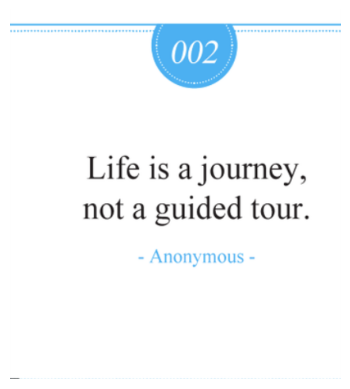

In [16]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('data/text.png', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

In [17]:
text = pyt.image_to_string(img, lang = 'eng')
print(text)

Life is a journey,
not a guided tour.

- Anonymous -



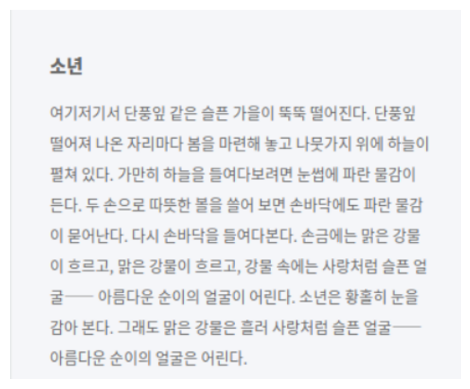

In [18]:
# 한글 이미지 인식
img = cv2.imread('data/story.png', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

In [19]:
text2 = pyt.image_to_string(img, lang = 'kor')
print(text2)
# EasyOCR, 네이버 CLOVA OCR, 구글 VISION API

소 년

여 기 저 기 서 단 풍 잎 같 은 슬 픈 가 을 이 뚝 뚝 떨 어 진 다 . 단 풍 잎
떨 어져 나 온 자 리 마 다 봄 을 마 련해 놓 고 나 못 가 지 위 에 하 늘 이
펼 쳐 있 다 . 가 만 히 하 늘 을 들 여 다 보 려면 눈 썸 에 파 란 물 감 이
든 다 . 두 손 으 로 따 뜻 한 볼 을 쓸 어 보 면 손 바 닥 에 도 파 란 물 감
이 묻 어 난 다 . 다 시 손 바 닥 을 들 여 다 본 다 . 손 금 에 는 맑 은 강 물
이 흐 르 고 , 맑 은 강 물 이 흐 르 고 , 강 물 속 에 는 사 랑 처 럼 슬 픈 얼
굴 - 아 름 다운 순 이 의 얼 굴 이 어 린 다 . 소 년 은 황 훌 히 눈 을
감 아 본 다 . 그 래도 맑 은 강 물 은 흘 러 사 랑 처 럼 슬 픈 얼 굴 - ㅡ
아 름 다운 순 이 의 얼 굴 은 어 린 다 .



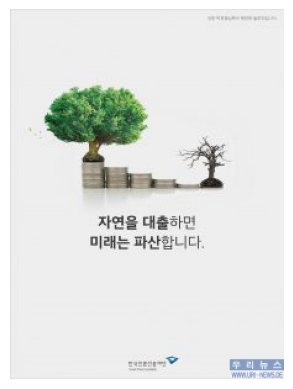

자 연 을 대 출 하 면
미 래 는 파 산 합 니 다 .




In [23]:
# 실습 1. nature.png 파일을 읽어서 plt로 출력하기
# COLOR로 가져와서 색상 변환하고 출력하기
# pytesseract 사용해서 글자 뽑아내보기
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('data/nature.png', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

text = pyt.image_to_string(img, lang = 'kor')
print(text)


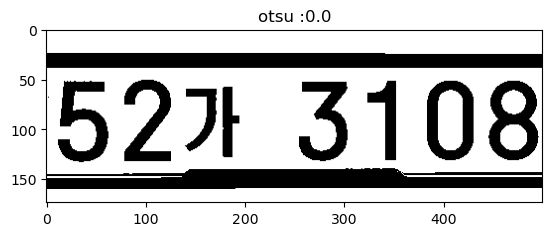

52 가 3108



In [27]:
# car.png 불러와서 출력해보기
img_car = cv2.imread('data/car.png', cv2.IMREAD_GRAYSCALE)
th_val, img_car = cv2.threshold(img_car, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img_car_crop = img_car[:, 105:605]

plt.imshow(img_car_crop, cmap = 'gray')
plt.title(f'otsu :{thr_val}')
plt.show()

text_car = pyt.image_to_string(img_car_crop, lang = 'kor')
print(text_car)
# Tesseract는 내부적으로 grayscale로 변환하지만
# 번호판처럼 대비가 약하고 패턴이 섞인 이미지는
# binary thresholding / adaptive thresholding 없이는 거의 안읽힘
# 실습 2 - tesseract로 아래 번호판 읽어서 출력해보기

### 이미지 블렌딩

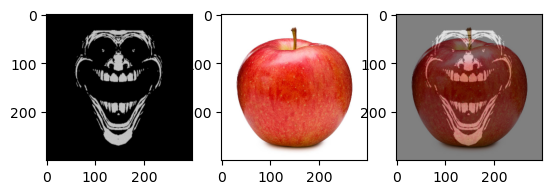

In [28]:
# 이미지 2개 불러오기
img1 = cv2.imread('data/trollge.jpg')
img2 = cv2.imread('data/apple.jpg')
# 색상공간 변환 bgr -> rgb
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
# 이미지 크기 변경 - 사이즈가 동일해랴 블렌딩이 가능
img1 = cv2.resize(img1, dsize = (300, 300))
img2 = cv2.resize(img2, dsize = (300, 300))
# 이미지 가중치 조절 : cv2.addWeighted(이미지1, 가중치1, 이미지2, 가중치2, 전체가중치)
# 전체 가중치(gamma) : 전체 이미지에 더해지는 밝기
result = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)

# 출력해보기
plt.subplot(1, 3, 1)
plt.imshow(img1)
plt.subplot(1, 3, 2)
plt.imshow(img2)
plt.subplot(1, 3, 3)
plt.imshow(result)

plt.show()